# **Problem I: Classicfication - Credit Card Fraud Detection**

## Data Exploration

In [53]:
import numpy as np
import pandas as pd

creditcard_fraud_df = pd.read_csv('creditcard.csv')
creditcard_fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Total number of legit transaction:  284315
Total number of fraud transaction:  492
Fraud percentage: 0.1727485630620034%


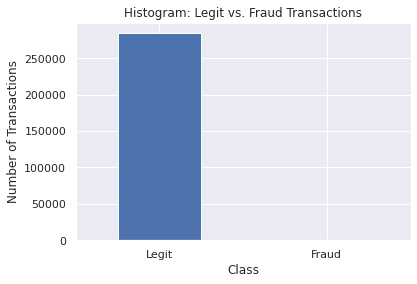

In [54]:
import matplotlib.pyplot as plt

class_count = creditcard_fraud_df.value_counts(creditcard_fraud_df['Class'])
class_count.plot(kind='bar', rot=0)
plt.xticks(range(2), ['Legit', 'Fraud'])
plt.ylabel('Number of Transactions')
plt.title('Histogram: Legit vs. Fraud Transactions')


legit = len(creditcard_fraud_df[creditcard_fraud_df.Class==0])
fraud = len(creditcard_fraud_df[creditcard_fraud_df.Class==1])

print("Total number of legit transaction: ", legit)
print("Total number of fraud transaction: ", fraud)
print("Fraud percentage: {}%".format(fraud/(fraud+legit)*100))

plt.show()

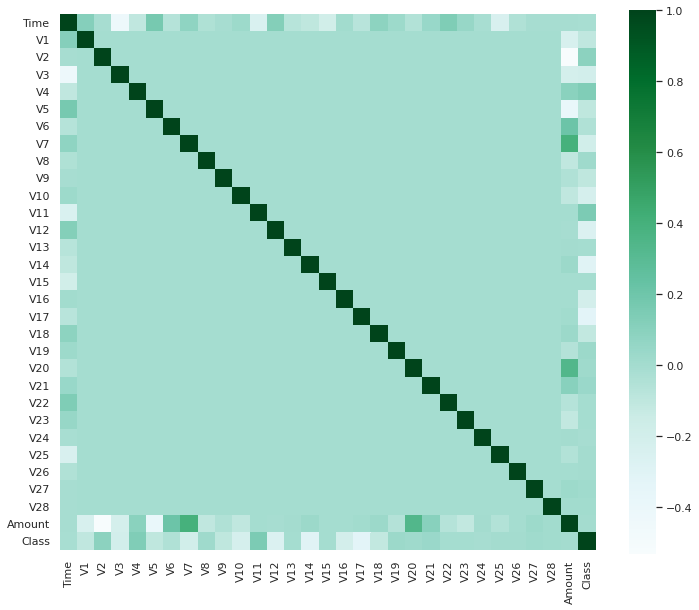

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = creditcard_fraud_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmat, square=True, cmap='BuGn', linecolor='w', annot=False)
plt.show()

## Preprocessing Data Set

In [56]:
creditcard_fraud_df.dropna()

# Data Matrix X
X = np.array(creditcard_fraud_df.iloc[:,1:30])

# Target y
y = np.array(creditcard_fraud_df.iloc[:,-1])

print(X.shape, y.shape)

(284807, 29) (284807,)


In [57]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Instantiate the classfiers and make a list
classifiers = []

## Case1: Logistic Regression With Data-Level Preprocessing





In [58]:
from sklearn.utils import multiclass
from sklearn.linear_model import LogisticRegression

# Train
clf_log_reg = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

classifiers.append(clf_log_reg)

clf_log_reg.fit(X_train_resampled, y_train_resampled)

# Test
y_pred = clf_log_reg.predict(X_test)
y_prob = clf_log_reg.predict_proba(X_test)[::,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


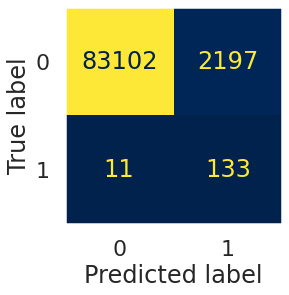

Precision: 0.05708154506437768, Recall: 0.9236111111111112


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

sns.set_context("poster")

# Create fusion matrix
disp = plot_confusion_matrix(clf_log_reg, X_test, y_test, cmap='cividis', colorbar=False)

# Find Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.grid(False)
plt.show()

# Print Precsion and Recall
print("Precision: {}, Recall: {}".format(precision, recall))

[[83102  2197]
 [   11   133]]


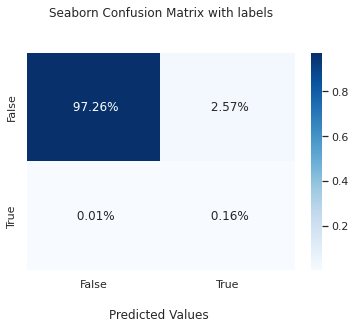

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling

mat = confusion_matrix(y_test, y_pred)
print(mat)
ax = sns. heatmap (mat/np. sum(mat), annot=True, fmt=' .2%',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n') ;
ax.set_xlabel('\nPredicted Values ')
ax.set_label('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True' ])
## Display the visualization of the Confusion Matrix.
plt.show()

Evaluate Performance of Logistics Regression with Data-level Preprocessing

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score

print('Logistics Regression')
print('Evaluation:\t{}'.format(mse(y_test, y_pred, squared=False)))
print('Accuracy: \t{}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t{}'.format(precision_score(y_test, y_pred)))
print('Recall: \t{}'.format(recall_score(y_test, y_pred)))
print('F1 Score: \t{}'.format(f1_score(y_test, y_pred)))
print('AUC Score: \t{}'.format(roc_auc_score(y_test, y_prob)))

Logistics Regression
Evaluation:	0.16075381570282382
Accuracy: 	0.9741582107369825
Precision: 	0.05708154506437768
Recall: 	0.9236111111111112
F1 Score: 	0.10751818916734034
AUC Score: 	0.9744947837085495


## Case 2: Support Vector Machine

In [62]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')

svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred = svm_clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[85078,   221],
       [   37,   107]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


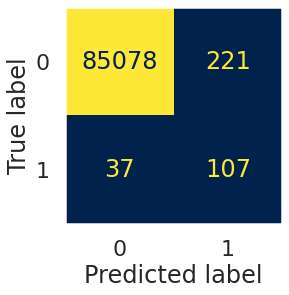

Precision: 0.32621951219512196, Recall: 0.7430555555555556


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

sns.set_context("poster")

# Create fusion matrix
disp = plot_confusion_matrix(svm_clf, X_test, y_test, cmap='cividis', colorbar=False)

# Find Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.grid(False)
plt.show()

# Print Precsion and Recall
print("Precision: {}, Recall: {}".format(precision, recall))

[[85078   221]
 [   37   107]]


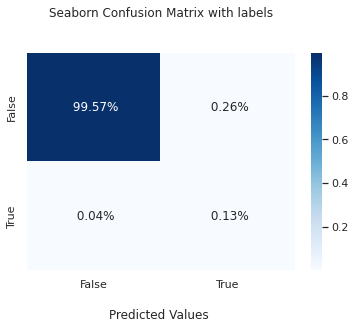

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling

mat = confusion_matrix(y_test, y_pred)
print(mat)
ax = sns. heatmap (mat/np. sum(mat), annot=True, fmt=' .2%',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n') ;
ax.set_xlabel('\nPredicted Values ')
ax.set_label('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True' ])
## Display the visualization of the Confusion Matrix.
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score

print('Support Vector Machine with SVC')
print('Evaluation:\t{}'.format(mse(y_test, y_pred, squared=False)))
print('Accuracy: \t{}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t{}'.format(precision_score(y_test, y_pred)))
print('Recall: \t{}'.format(recall_score(y_test, y_pred)))
print('F1 Score: \t{}'.format(f1_score(y_test, y_pred)))

Support Vector Machine with SVC
Evaluation:	0.054950494971208796
Accuracy: 	0.9969804431024192
Precision: 	0.32621951219512196
Recall: 	0.7430555555555556
F1 Score: 	0.45338983050847464


## Case 3: Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

classifiers.append(tree_clf)

tree_clf.fit(X_train_resampled, y_train_resampled)

y_pred = tree_clf.predict(X_test)
y_prob = tree_clf.predict_proba(X_test)[::,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


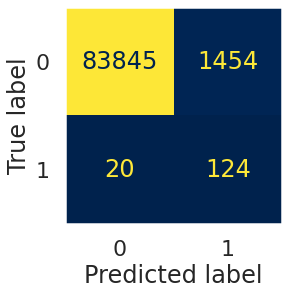

Precision: 0.07858048162230671, Recall: 0.8611111111111112


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

sns.set_context("poster")

# Create fusion matrix
disp = plot_confusion_matrix(tree_clf, X_test, y_test, cmap='cividis', colorbar=False)

# Find Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.grid(False)
plt.show()

# Print Precsion and Recall
print("Precision: {}, Recall: {}".format(precision, recall))

[[83845  1454]
 [   20   124]]


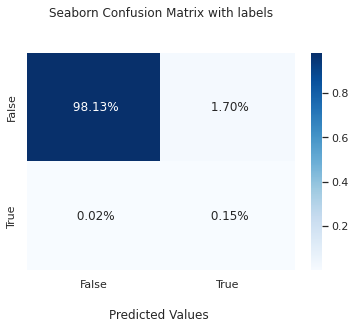

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling

mat = confusion_matrix(y_test, y_pred)
print(mat)
ax = sns. heatmap (mat/np. sum(mat), annot=True, fmt=' .2%',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n') ;
ax.set_xlabel('\nPredicted Values ')
ax.set_label('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True' ])
## Display the visualization of the Confusion Matrix.
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score

print('Decision Tree')
print('Evaluation:\t{}'.format(mse(y_test, y_pred, squared=False)))
print('Accuracy: \t{}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t{}'.format(precision_score(y_test, y_pred)))
print('Recall: \t{}'.format(recall_score(y_test, y_pred)))
print('F1 Score: \t{}'.format(f1_score(y_test, y_pred)))
print('AUC Score: \t{}'.format(roc_auc_score(y_test, y_prob)))

Decision Tree
Evaluation:	0.13134407838379697
Accuracy: 	0.982748733073511
Precision: 	0.07858048162230671
Recall: 	0.8611111111111112
F1 Score: 	0.1440185830429733
AUC Score: 	0.9534746483285592


## Case 4: Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=123, random_state=123)

classifiers.append(rnd_clf)

rnd_clf.fit(X_train_resampled, y_train_resampled)

y_pred = rnd_clf.predict(X_test)
y_prob = rnd_clf.predict_proba(X_test)[::,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


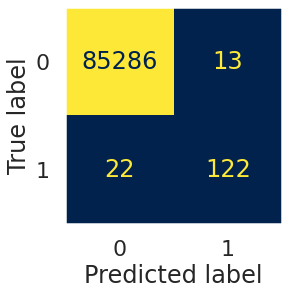

Precision: 0.9037037037037037, Recall: 0.8472222222222222


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

sns.set_context("poster")

# Create fusion matrix
disp = plot_confusion_matrix(rnd_clf, X_test, y_test, cmap='cividis', colorbar=False)

# Find Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.grid(False)
plt.show()

# Print Precsion and Recall
print("Precision: {}, Recall: {}".format(precision, recall))

[[85286    13]
 [   22   122]]


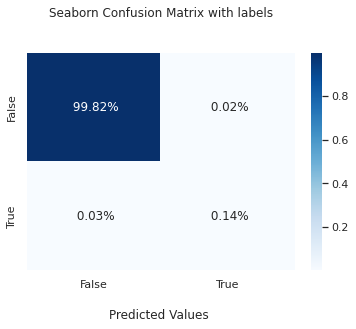

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns;
import seaborn as sns; sns.set() # for plot styling

mat = confusion_matrix(y_test, y_pred)
print(mat)
ax = sns. heatmap (mat/np. sum(mat), annot=True, fmt=' .2%',cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n') ;
ax.set_xlabel('\nPredicted Values ')
ax.set_label('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True' ])
## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score

print('Random Forest')
print('Evaluation:\t{}'.format(mse(y_test, y_pred, squared=False)))
print('Accuracy: \t{}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t{}'.format(precision_score(y_test, y_pred)))
print('Recall: \t{}'.format(recall_score(y_test, y_pred)))
print('F1 Score: \t{}'.format(f1_score(y_test, y_pred)))
print('AUC Score: \t{}'.format(roc_auc_score(y_test, y_prob)))

Random Forest
Evaluation:	0.02023931351818346
Accuracy: 	0.9995903701883126
Precision: 	0.9037037037037037
Recall: 	0.8472222222222222
F1 Score: 	0.8745519713261649
AUC Score: 	0.9878988583948489


## Summary ROC and AUC Scores

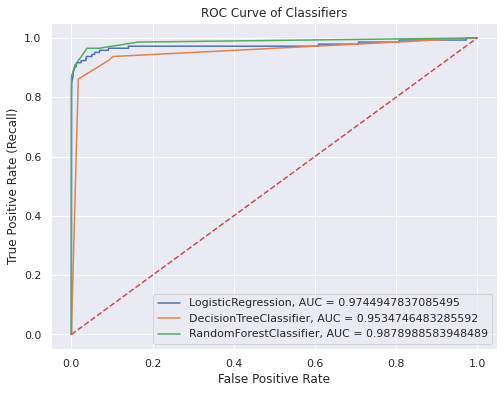

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_resampled, y_train_resampled)
    y_prob = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label="{}, AUC = {}".format(cls.__class__.__name__, auc))
    plt.legend(loc="lower right")

plt.title("ROC Curve of Classifiers")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.grid("True")
plt.show()

## Case 5: Neural Network Models

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense

nn_clf = Sequential()

nn_clf.add(keras.layers.Flatten(input_shape=X.shape[1:]))
nn_clf.add(keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
nn_clf.add(keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
nn_clf.add(keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
nn_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [76]:
batch_size = 5
epochs = 20
history = nn_clf.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size)

Epoch 1/20
79607/79607 [==============================] - 143s 2ms/step - loss: 0.0641 - accuracy: 0.9746
Epoch 2/20
79607/79607 [==============================] - 137s 2ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 3/20
79607/79607 [==============================] - 137s 2ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 4/20
79607/79607 [==============================] - 140s 2ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 5/20
79607/79607 [==============================] - 143s 2ms/step - loss: 0.0255 - accuracy: 0.9927
Epoch 6/20
79607/79607 [==============================] - 139s 2ms/step - loss: 0.0233 - accuracy: 0.9935
Epoch 7/20
79607/79607 [==============================] - 143s 2ms/step - loss: 0.0224 - accuracy: 0.9939
Epoch 8/20
79607/79607 [==============================] - 142s 2ms/step - loss: 0.0219 - accuracy: 0.9941
Epoch 9/20
79607/79607 [==============================] - 143s 2ms/step - loss: 0.0214 - accuracy: 0.9943
Epoch 10/20
79607/79607 [=====================

In [77]:
y_pred = nn_clf.predict(X_test)
y_pred = (y_pred>0.5)
print(y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[84553   746]
 [   15   129]]


In [79]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score

print('Evaluation:\t{}'.format(mse(y_test, y_pred, squared=False)))
print('Accuracy: \t{}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t{}'.format(precision_score(y_test, y_pred)))
print('Recall: \t{}'.format(recall_score(y_test, y_pred)))
print('F1 Score: \t{}'.format(f1_score(y_test, y_pred)))

Evaluation:	0.09437437404811198
Accuracy: 	0.991093477523027
Precision: 	0.14742857142857144
Recall: 	0.8958333333333334
F1 Score: 	0.253189401373896


# **Problem II: Regression Problem - Energy Efficiency**

### Import Data

In [2]:
import pandas as pd
ee_df = pd.read_excel('ENB2012_data.xlsx')
ee_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
ee_df = ee_df.rename(columns={'X1':'Relative Compactness',
                              'X2':'Surface Area',
                              'X3':'Wall Area',
                              'X4':'Roof Area',
                              'X5':'Overall Height',
                              'X6':'Orientation',
                              'X7':'Glazing Area',
                              'X8':'Glazing Area Distribution',
                              'Y1':'Heating Load',
                              'Y2':'Cooling Load'})
ee_df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
ee_df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
print(ee_df.isnull().sum())

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


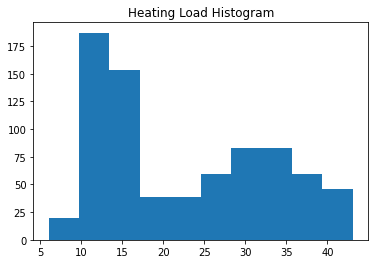

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(ee_df['Heating Load'])
plt.title("Heating Load Histogram")
plt.show()

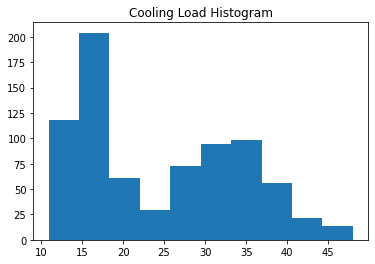

In [7]:
import matplotlib.pyplot as plt
plt.hist(ee_df['Cooling Load'])
plt.title("Cooling Load Histogram")
plt.show()

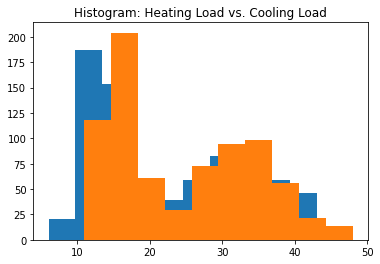

In [8]:
import matplotlib.pyplot as plt
plt.hist(ee_df['Heating Load'])
plt.hist(ee_df['Cooling Load'])
plt.title("Histogram: Heating Load vs. Cooling Load")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1541e00d0>,
      dtype=object)

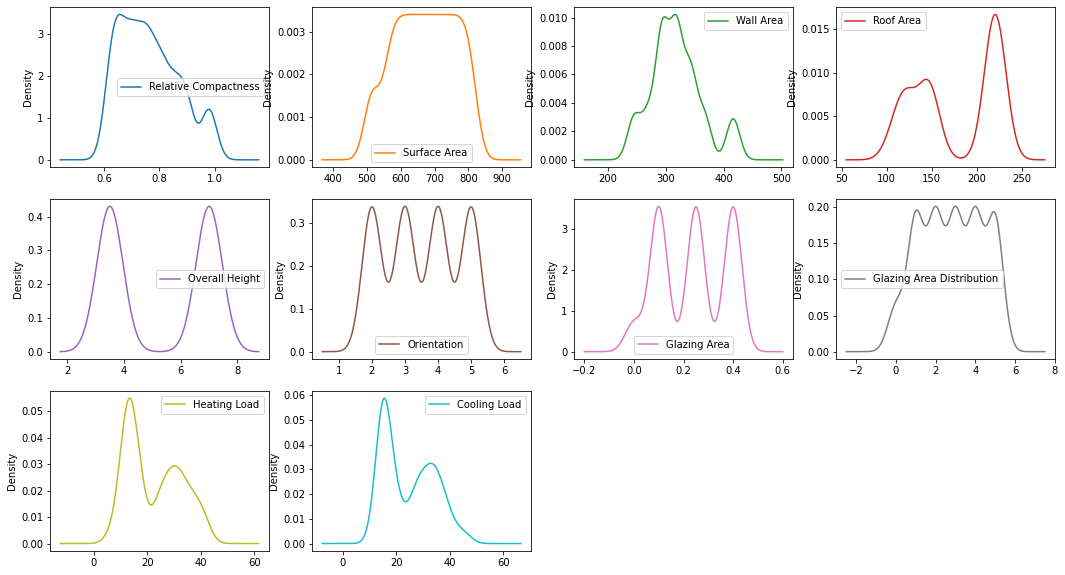

In [9]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
ee_df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(18,10))

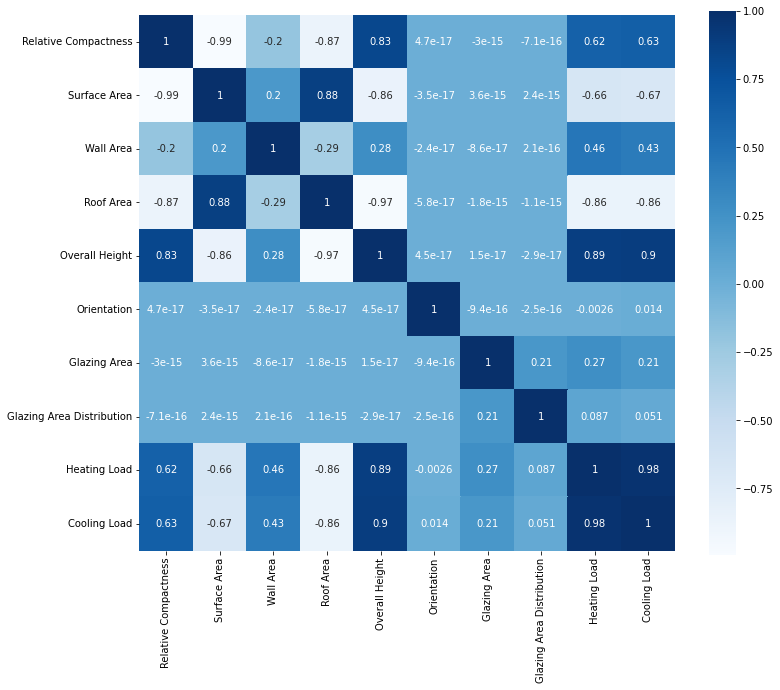

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = ee_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmat, square=True, cmap='Blues', linecolor='w', annot=True)
plt.show()

### Define X and Y

In [29]:
import numpy as np

X = np.array(ee_df.iloc[:,:8])
y = ee_df.iloc[:,-2:]
y1 = np.array(y.iloc[:,:1])
y2 = np.array(y.iloc[:,1:])

print(X.shape, y.shape)
print(y1.shape, y2.shape)

(768, 8) (768, 2)
(768, 1) (768, 1)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train1, y_test1, y_train2, y_test2 = train_test_split(X, y1, y2, test_size=0.3, random_state=420)

print(X_train.shape, X_test.shape)
print(y_train1.shape, y_test1.shape)
print(y_train2.shape, y_test2.shape)

(537, 8) (231, 8)
(537, 1) (231, 1)
(537, 1) (231, 1)


## Case 1: Linear Regression

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define pip
pipe1 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('regressor', LinearRegression()),
])

pipe2 = Pipeline([
                 ('scaler', StandardScaler()),
                 ('regressor', LinearRegression())
])


# Train
pipe1.fit(X_train, y_train1)
pipe2.fit(X_train, y_train2)


# Predict
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)

print(y_pred1.shape, y_pred2.shape)

(231, 1) (231, 1)


Heating Load
Evaluation MSE:	 7.880991665622867
Explained score: 0.9285009975188163


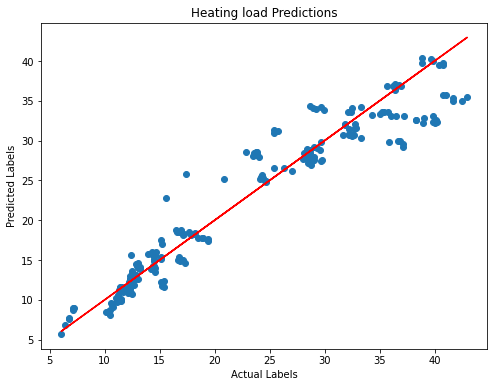

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score
print('Heating Load')
print('Evaluation MSE:\t {}'.format(mse(y_test1, y_pred1, squared='False')))
print('Explained score: {}'.format(explained_variance_score(y_test1, y_pred1)))

plt.figure(figsize=(8,6))
plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heating load Predictions')

plt.plot(y_test1, y_test1, color='red')
plt.show()

Cooling Load
Evaluation MSE:	 9.703113537912834
Explained score: 0.8991828201441125


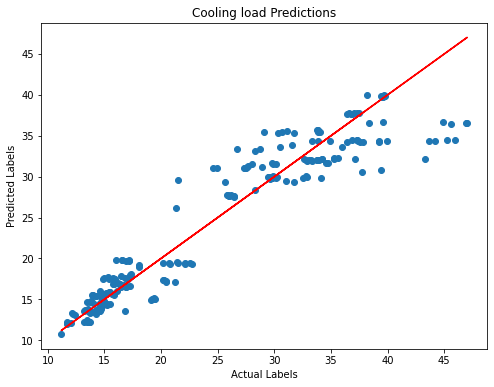

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score
print('Cooling Load')
print('Evaluation MSE:\t {}'.format(mse(y_test2, y_pred2, squared='False')))
print('Explained score: {}'.format(explained_variance_score(y_test2, y_pred2)))

plt.figure(figsize=(8,6))
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Cooling load Predictions')

plt.plot(y_test2, y_test2, color='red')
plt.show()

## Case 2: Polynomial Regression

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
                          
# Define pip
pipe1 = Pipeline([
                 ('scaler', StandardScaler()), 
                 ('poly', PolynomialFeatures(degree=3, include_bias='False')),
                 ('regressor', LinearRegression())
])

pipe2 = Pipeline([
                 ('scaler', StandardScaler()), 
                 ('poly', PolynomialFeatures(degree=3, include_bias='False')),
                 ('regressor', LinearRegression()),
])


# Train
pipe1.fit(X_train, y_train1)
pipe2.fit(X_train, y_train2)


# Predict
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)

Heating Load
Evaluation MSE:	 0.24245235038691273
Explained score: 0.9977711687193728


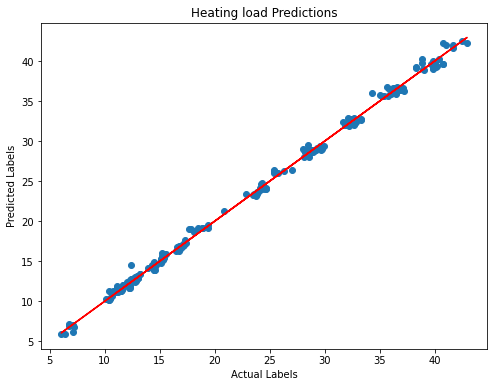

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score
print('Heating Load')
print('Evaluation MSE:\t {}'.format(mse(y_test1, y_pred1, squared='False')))
print('Explained score: {}'.format(explained_variance_score(y_test1, y_pred1)))

plt.figure(figsize=(8,6))
plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heating load Predictions')

plt.plot(y_test1, y_test1, color='red')
plt.show()

Cooling Load
Evaluation MSE:	 2.5081070275579176
Explained score: 0.9736643895147131


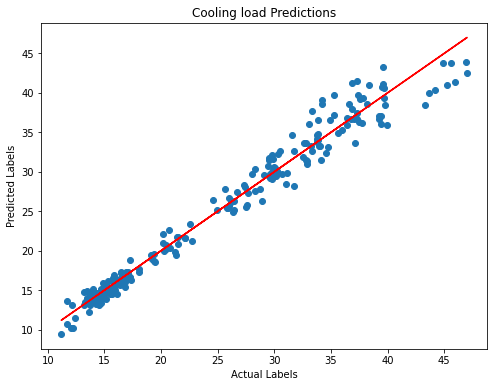

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score
print('Cooling Load')
print('Evaluation MSE:\t {}'.format(mse(y_test2, y_pred2, squared='False')))
print('Explained score: {}'.format(explained_variance_score(y_test2, y_pred2)))

plt.figure(figsize=(8,6))
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Cooling load Predictions')

plt.plot(y_test2, y_test2, color='red')
plt.show()

## Case 3: Regulization Regression

### a. LASSO Regression

In [37]:
from sklearn.linear_model import Lasso

# Train
lasso1 = Lasso()
lasso1.fit(X_train, y_train1)

lasso2 = Lasso()
lasso2.fit(X_train, y_train2)

# Predict
y_pred1 = lasso1.predict(X_test)
y_pred2 = lasso2.predict(X_test)

Lasso Heating Load
Lasso Test MSE: 22.037265260760975
Explained score: 0.795019984290958


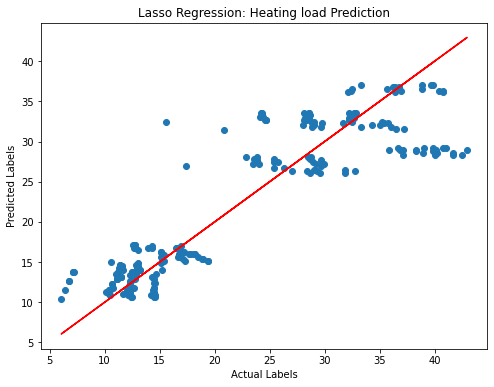

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

print('Lasso Heating Load')
print('Lasso Test MSE: {}'.format(mse(y_test1, y_pred1, squared=5)))
print('Explained score: {}'.format(explained_variance_score(y_test1, y_pred1)))

plt.figure(figsize=(8,6))
plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Lasso Regression: Heating load Prediction')

plt.plot(y_test1, y_test1, color='red')
plt.show()

Lasso Heating Load
Lasso Test MSE: 21.66489307653214
Explained score: 0.7716161573512936


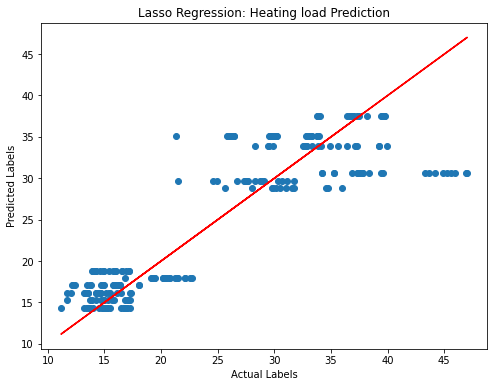

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

print('Lasso Heating Load')
print('Lasso Test MSE: {}'.format(mse(y_test2, y_pred2, squared=5)))
print('Explained score: {}'.format(explained_variance_score(y_test2, y_pred2)))

plt.figure(figsize=(8,6))
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Lasso Regression: Heating load Prediction')

plt.plot(y_test2, y_test2, color='red')
plt.show()

### b. Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

# Train
ridge1 = Ridge()
ridge1.fit(X_train, y_train1)

ridge2 = Ridge()
ridge2.fit(X_train, y_train2)

# Predict
y_pred1 = ridge1.predict(X_test)
y_pred2 = ridge2.predict(X_test)

Heating Load
Ridge Test MSE: 2.9146763715821744
Explained score: 0.9225404933129574


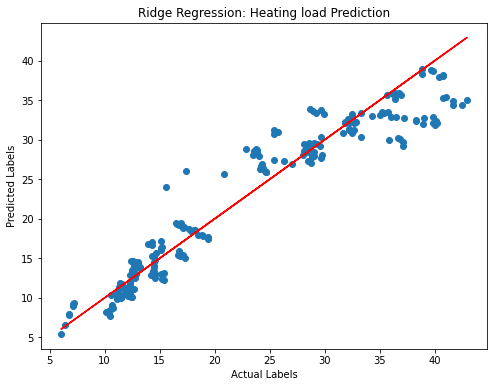

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

print('Heating Load')
print('Ridge Test MSE: {}'.format(mse(y_test1, y_pred1, squared=False)))
print('Explained score: {}'.format(explained_variance_score(y_test1, y_pred1)))

plt.figure(figsize=(8,6))
plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Ridge Regression: Heating load Prediction')

plt.plot(y_test1, y_test1, color='red')
plt.show()

Cooling Load
Ridge Test MSE: 3.2164805690505323
Explained score: 0.8921572470259151


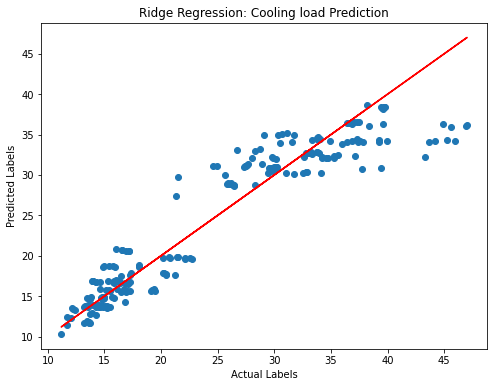

In [42]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt

print('Cooling Load')
print('Ridge Test MSE: {}'.format(mse(y_test2, y_pred2, squared=False)))
print('Explained score: {}'.format(explained_variance_score(y_test2, y_pred2)))

plt.figure(figsize=(8,6))
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Ridge Regression: Cooling load Prediction')

plt.plot(y_test2, y_test2, color='red')
plt.show()

## Case 4: Support Vector Regression (SVR)

In [43]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Scale X and Y
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y1_scaler = StandardScaler()
y_train1 = y1_scaler.fit_transform(y_train1)
y_test1 = y1_scaler.transform(y_test1)

y2_scaler = StandardScaler()
y_train2 = y2_scaler.fit_transform(y_train2)
y_test2 = y2_scaler.transform(y_test2)

# Train
y_train1 = y_train1.reshape(-1,1)
y_train2 = y_train2.reshape(-1,1)

y_train1 = np.ravel(y_train1)
y_train2 = np.ravel(y_train2)


svr1 = SVR(kernel='rbf')
svr1.fit(X_train, y_train1)

svr2 = SVR(kernel='rbf')
svr2.fit(X_train, y_train2)

# Predict
y_pred1 = svr1.predict(X_test)
y_pred2 = svr2.predict(X_test)

SVR Heating Load
Evaluation MSE:	 0.04928249856721011
Explained score: 0.9550994798153676


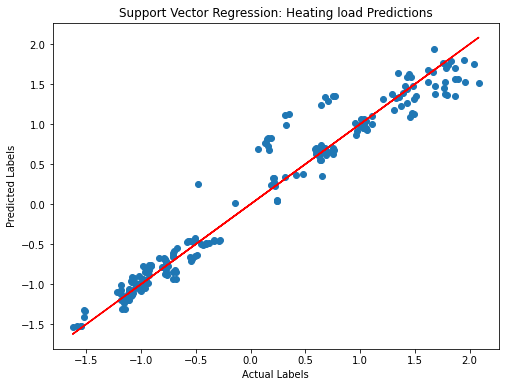

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

print('SVR Heating Load')
print('Evaluation MSE:\t {}'.format(mse(y_test1, y_pred1, squared='False')))
print('Explained score: {}'.format(explained_variance_score(y_test1, y_pred1)))

plt.figure(figsize=(8,6))
plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Support Vector Regression: Heating load Predictions')

plt.plot(y_test1, y_test1, color='red')
plt.show()

SVR Cooling Load
Evaluation MSE:	 0.08931678352443816
Explained score: 0.9169573680386633


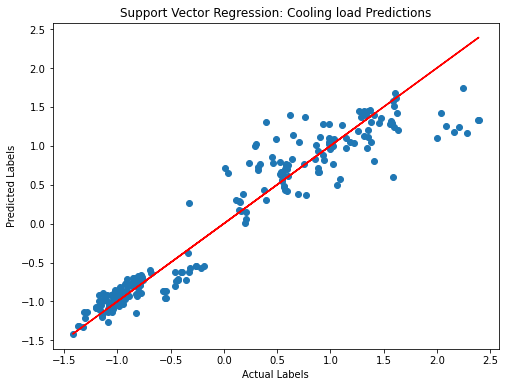

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

print('SVR Cooling Load')
print('Evaluation MSE:\t {}'.format(mse(y_test2, y_pred2, squared='False')))
print('Explained score: {}'.format(explained_variance_score(y_test2, y_pred2)))

plt.figure(figsize=(8,6))
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Support Vector Regression: Cooling load Predictions')

plt.plot(y_test2, y_test2, color='red')
plt.show()